<a href="https://colab.research.google.com/github/hardhik-25/ML_Projects/blob/main/Logistics_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# from plotly.express as px


In [ ]:
df=pd.read_csv('/content/sample_data/ML+01+Logistic+Regession+Dataset+1 (4).csv')

In [ ]:
df.sample(5)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,Outcome,CallStart,CallEnd,CarInsurance
3531,3532,35,blue-collar,married,primary,0,373,0,0,cellular,17,apr,2,-1,0,NaN,15:19:34,15:25:09,0
474,475,42,blue-collar,married,primary,0,505,1,0,NaN,14,may,2,-1,0,NaN,17:56:07,18:04:48,0
1302,1303,44,management,married,NaN,0,282,0,0,cellular,9,mar,2,154,3,success,13:04:17,13:15:57,1
3921,3922,35,technician,single,tertiary,0,4,1,0,cellular,24,jul,1,-1,0,NaN,15:49:56,15:52:31,0
2191,2192,27,student,single,tertiary,0,311,0,0,telephone,2,mar,3,322,1,other,13:15:03,13:18:10,1


In [ ]:
df.shape

(4000, 19)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                4000 non-null   int64 
 1   Age               4000 non-null   int64 
 2   Job               3981 non-null   object
 3   Marital           4000 non-null   object
 4   Education         3831 non-null   object
 5   Default           4000 non-null   int64 
 6   Balance           4000 non-null   int64 
 7   HHInsurance       4000 non-null   int64 
 8   CarLoan           4000 non-null   int64 
 9   Communication     3098 non-null   object
 10  LastContactDay    4000 non-null   int64 
 11  LastContactMonth  4000 non-null   object
 12  NoOfContacts      4000 non-null   int64 
 13  DaysPassed        4000 non-null   int64 
 14  PrevAttempts      4000 non-null   int64 
 15  Outcome           958 non-null    object
 16  CallStart         4000 non-null   object
 17  CallEnd       

In [ ]:
df.dtypes

Id                   int64
Age                  int64
Job                 object
Marital             object
Education           object
Default              int64
Balance              int64
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
NoOfContacts         int64
DaysPassed           int64
PrevAttempts         int64
Outcome             object
CallStart           object
CallEnd             object
CarInsurance         int64
dtype: object

In [ ]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000


In [ ]:
(df.isnull().sum()/len(df))*100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
Outcome             76.050
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [ ]:
df.corr()['CarInsurance']

<ipython-input-9-68c32a571daa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['CarInsurance']


Id               -0.017864
Age               0.039158
Default          -0.039506
Balance           0.041561
HHInsurance      -0.203419
CarLoan          -0.092131
LastContactDay   -0.061271
NoOfContacts     -0.114884
DaysPassed        0.138943
PrevAttempts      0.148763
CarInsurance      1.000000
Name: CarInsurance, dtype: float64

In [ ]:
df[['CarInsurance','Outcome']]

,CarInsurance,Outcome
0,0,NaN
1,0,NaN
2,1,failure
3,1,NaN
4,0,NaN
...,...,...
3995,1,failure
3996,0,NaN
3997,0,NaN
3998,0,failure


In [ ]:
df.drop(['Outcome'],axis=1,inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.nunique()

Id                  4000
Age                   70
Job                   11
Marital                3
Education              3
Default                2
Balance             2178
HHInsurance            2
CarLoan                2
Communication          2
LastContactDay        31
LastContactMonth      12
NoOfContacts          35
DaysPassed           330
PrevAttempts          20
CallStart           3777
CallEnd             3764
CarInsurance           2
dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

Id                   0.000
Age                  0.000
Job                  0.475
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [ ]:
df['Job'].mode()[0]
df['Job']=df['Job'].fillna(df['Job'].mode()[0])

In [ ]:
df.isnull().sum()/len(df)*100

Id                   0.000
Age                  0.000
Job                  0.000
Marital              0.000
Education            4.225
Default              0.000
Balance              0.000
HHInsurance          0.000
CarLoan              0.000
Communication       22.550
LastContactDay       0.000
LastContactMonth     0.000
NoOfContacts         0.000
DaysPassed           0.000
PrevAttempts         0.000
CallStart            0.000
CallEnd              0.000
CarInsurance         0.000
dtype: float64

In [ ]:
df['Education'].value_counts()

secondary    1988
tertiary     1282
primary       561
Name: Education, dtype: int64

In [ ]:
df.groupby(['Education'] )['Age'].mean()

Education
primary      47.438503
secondary    40.199698
tertiary     39.724649
Name: Age, dtype: float64

In [ ]:
df['Education']=np.where((df['Education'].isnull()) & (df['Age']>=47),'primary',df['Education'])
df['Education']=np.where((df['Education'].isnull()) & (df['Age']>=40),'secondary',df['Education'])
df['Education']=np.where((df['Education'].isnull()) & (df['Age']<40),'tertiary',df['Education'])

In [ ]:
df['Education'].isnull().sum()

0

In [ ]:
df['Education'].value_counts()

secondary    2024
tertiary     1350
primary       626
Name: Education, dtype: int64

In [ ]:
df.isnull().sum()/len(df)*100

Id                   0.00
Age                  0.00
Job                  0.00
Marital              0.00
Education            0.00
Default              0.00
Balance              0.00
HHInsurance          0.00
CarLoan              0.00
Communication       22.55
LastContactDay       0.00
LastContactMonth     0.00
NoOfContacts         0.00
DaysPassed           0.00
PrevAttempts         0.00
CallStart            0.00
CallEnd              0.00
CarInsurance         0.00
dtype: float64

In [ ]:
df['Communication'].isnull().sum()

902

In [ ]:
df['Communication'].value_counts()

cellular     2831
telephone     267
Name: Communication, dtype: int64

In [ ]:
df['Communication']=df['Communication'].fillna('telephone')

In [ ]:
df['Communication'].isnull().sum()

0

In [ ]:
df.head(4)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,13:45:20,13:46:30,0
1,2,32,blue-collar,married,primary,0,1156,1,0,telephone,26,may,5,-1,0,14:49:03,14:52:08,0
2,3,29,management,single,tertiary,0,637,1,0,cellular,3,jun,1,119,1,16:30:24,16:36:04,1
3,4,25,student,single,primary,0,373,1,0,cellular,11,may,2,-1,0,12:06:43,12:20:22,1


In [ ]:
df['CallEnd']=pd.to_datetime(df['CallEnd'], errors='coerce')
df['CallStart']=pd.to_datetime(df['CallStart'], errors='coerce')

In [ ]:
df['Duration']=df['CallEnd']-df['CallStart']

In [ ]:
df.head(1)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallStart,CallEnd,CarInsurance,Duration
0,1,32,management,single,tertiary,0,1218,1,0,telephone,28,jan,2,-1,0,2023-11-04 13:45:20,2023-11-04 13:46:30,0,0 days 00:01:10


In [ ]:
df['Duration']=(df['CallEnd'].dt.minute - df['CallStart'].dt.minute)*60 + df['CallEnd'].dt.second - df['CallStart'].dt.second

In [ ]:
df.describe()

,Id,Age,Default,Balance,HHInsurance,CarLoan,LastContactDay,NoOfContacts,DaysPassed,PrevAttempts,CarInsurance,Duration
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2000.500000,41.214750,0.014500,1532.937250,0.49275,0.133000,15.721250,2.607250,48.706500,0.717500,0.401000,-20.856000
std,1154.844867,11.550194,0.119555,3511.452489,0.50001,0.339617,8.425307,3.064204,106.685385,2.078647,0.490162,1028.792854
min,1.000000,18.000000,0.000000,-3058.000000,0.00000,0.000000,1.000000,1.000000,-1.000000,0.000000,0.000000,-3560.000000
25%,1000.750000,32.000000,0.000000,111.000000,0.00000,0.000000,8.000000,1.000000,-1.000000,0.000000,0.000000,92.000000
50%,2000.500000,39.000000,0.000000,551.500000,0.00000,0.000000,16.000000,2.000000,-1.000000,0.000000,0.000000,187.000000
75%,3000.250000,49.000000,0.000000,1619.000000,1.00000,0.000000,22.000000,3.000000,-1.000000,0.000000,1.000000,370.250000
max,4000.000000,95.000000,1.000000,98417.000000,1.00000,1.000000,31.000000,43.000000,854.000000,58.000000,1.000000,2372.000000


<Axes: >

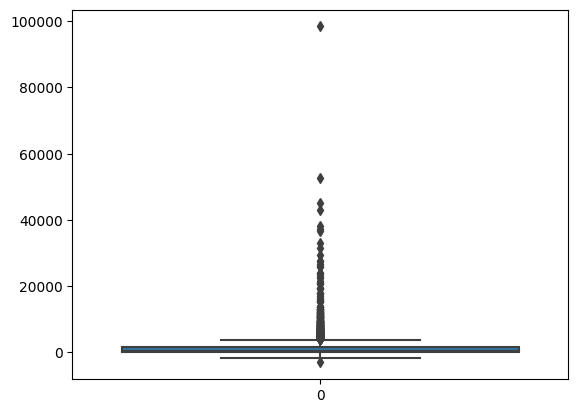

In [ ]:
sns.boxplot(df['Balance'])

<Axes: xlabel='Balance', ylabel='Count'>

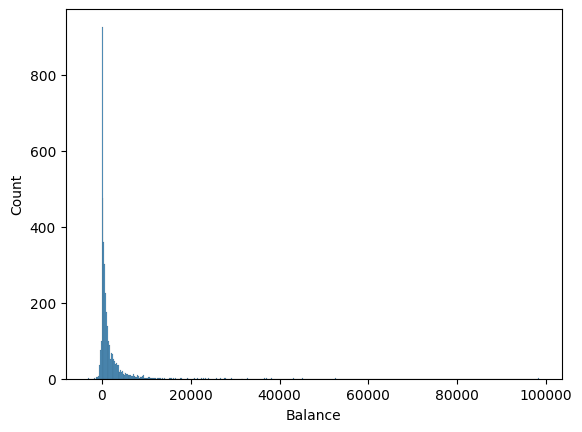

In [ ]:
sns.histplot(df['Balance'])

<Axes: >

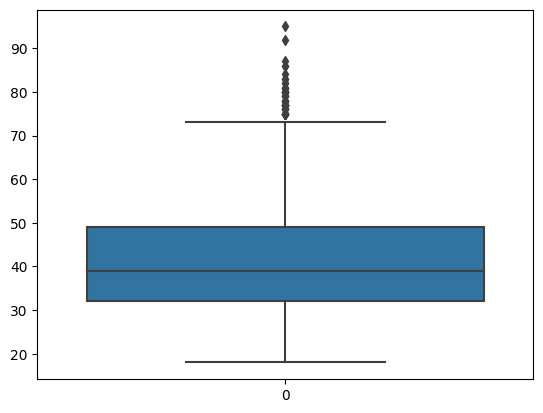

In [ ]:
sns.boxplot(df['Age'])

In [ ]:
df['Age'].describe()
# 0-24 - young
# 24-48 - adult
# 48-72 - Senior
# 72-100 - Old

count    4000.000000
mean       41.214750
std        11.550194
min        18.000000
25%        32.000000
50%        39.000000
75%        49.000000
max        95.000000
Name: Age, dtype: float64

In [ ]:
df['Age']=pd.cut(df['Age'],bins=[15,30,45,60,100],labels=['Young','Adult','Senior','Old'])

<Axes: xlabel='Age', ylabel='count'>

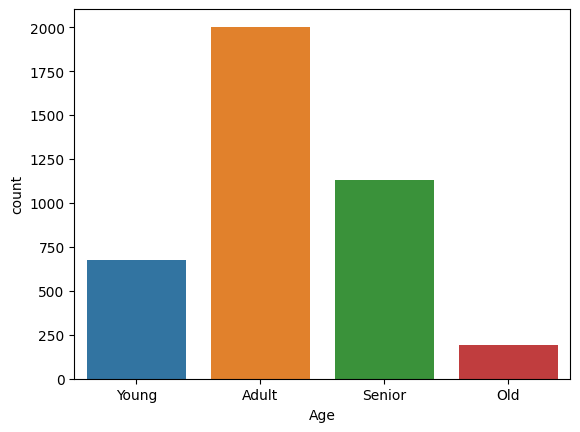

In [ ]:
sns.countplot(x='Age',data=df)

In [ ]:
df['Balance'].describe()
df['Balance']=pd.cut(df["Balance"],bins=[-4000,0,5000,100000],labels=['Negative','Mid','High'])

<Axes: xlabel='Balance', ylabel='Count'>

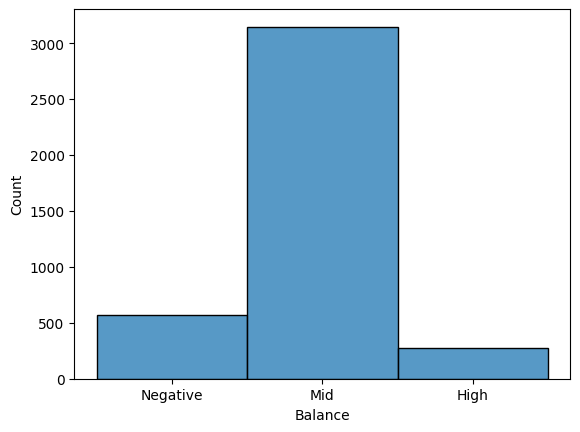

In [ ]:
sns.histplot(df['Balance'])

In [ ]:
df.drop(['CallStart'],axis=1,inplace=True)
df.head()

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallEnd,CarInsurance,Duration
0,1,Adult,management,single,tertiary,0,Mid,1,0,telephone,28,jan,2,-1,0,2023-11-04 13:46:30,0,70
1,2,Adult,blue-collar,married,primary,0,Mid,1,0,telephone,26,may,5,-1,0,2023-11-04 14:52:08,0,185
2,3,Young,management,single,tertiary,0,Mid,1,0,cellular,3,jun,1,119,1,2023-11-04 16:36:04,1,340
3,4,Young,student,single,primary,0,Mid,1,0,cellular,11,may,2,-1,0,2023-11-04 12:20:22,1,819
4,5,Young,management,married,tertiary,0,Mid,0,0,cellular,3,jun,1,-1,0,2023-11-04 14:38:56,0,192


In [ ]:
df['PrevAttempts']=pd.cut(df['PrevAttempts'],bins=[-1,0,60],labels=[0,1])
df.head(1)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallEnd,CarInsurance,Duration
0,1,Adult,management,single,tertiary,0,Mid,1,0,telephone,28,jan,2,-1,0,2023-11-04 13:46:30,0,70


In [ ]:
df['NoOfContacts']=pd.cut(df['NoOfContacts'],bins=[-1,1,3,45],labels=['Normal','Mid','High'])
df.sample(5)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallEnd,CarInsurance,Duration
2654,2655,Young,blue-collar,married,secondary,0,Negative,1,0,telephone,3,jun,Mid,-1,0,2023-11-04 18:01:10,0,-3062
1040,1041,Old,retired,married,primary,0,Mid,0,0,telephone,14,jun,High,116,1,2023-11-04 11:08:47,1,278
1215,1216,Adult,blue-collar,single,secondary,0,Mid,1,0,telephone,16,may,High,-1,0,2023-11-04 16:13:52,0,81
143,144,Adult,services,single,secondary,0,Negative,1,0,cellular,17,apr,Normal,-1,0,2023-11-04 14:40:34,0,135
1609,1610,Adult,admin.,married,secondary,0,Mid,1,0,cellular,12,may,Mid,-1,0,2023-11-04 15:51:27,0,131


In [ ]:
df['NoOfContacts'].isnull().sum()

0

<Axes: xlabel='NoOfContacts', ylabel='count'>

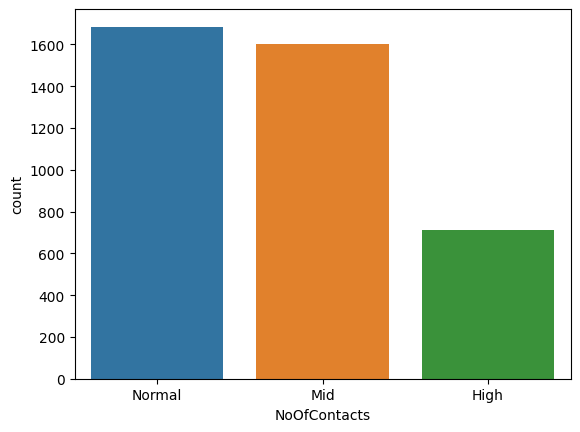

In [ ]:
sns.countplot(x='NoOfContacts',data=df)

In [ ]:
df['DaysPassed']=pd.cut(df['DaysPassed'],bins=[-2,-1,900],labels=['Past','Present'])
df.sample(3)

,Id,Age,Job,Marital,Education,Default,Balance,HHInsurance,CarLoan,Communication,LastContactDay,LastContactMonth,NoOfContacts,DaysPassed,PrevAttempts,CallEnd,CarInsurance,Duration
1422,1423,Adult,admin.,divorced,secondary,0,Mid,1,0,telephone,4,jun,Normal,Past,0,2023-11-04 16:17:32,1,908
839,840,Adult,services,divorced,secondary,0,Mid,1,0,telephone,18,jun,Mid,Past,0,2023-11-04 11:30:15,0,96
2907,2908,Young,blue-collar,single,secondary,0,High,1,0,telephone,28,may,Normal,Past,0,2023-11-04 17:31:27,0,615


In [ ]:
df['Job']=df['Job'].replace({'entrepreneur':'self-employed ','admin.':'management',
                             'student':'not-working','retired':'not-working','unemployed':'not-working','housemaid':'services','technician':'blue-collar'})

In [ ]:
df['Job'].unique()
df['Job'].value_counts()

blue-collar       1419
management        1371
not-working        510
services           439
self-employed      140
self-employed      121
Name: Job, dtype: int64

In [ ]:
df.dtypes

Id                           int64
Age                       category
Job                         object
Marital                     object
Education                   object
Default                      int64
Balance                   category
HHInsurance                  int64
CarLoan                      int64
Communication               object
LastContactDay               int64
LastContactMonth            object
NoOfContacts              category
DaysPassed                category
PrevAttempts              category
CallEnd             datetime64[ns]
CarInsurance                 int64
Duration                     int64
dtype: object

In [ ]:
df['Age']=df['Age'].replace({'Young':1,'Adult':2,'Senior':3,'Old':4})
#df['Education']=df['Education'].replace({'primary':1,'secondary':2,'tertiary':3})

In [ ]:
df['Balance']=df['Balance'].replace({'Negative':-1,'Mid':0,'High':1}) # negative: -1, mid:0, high:1
#df['NoOfContacts']=df['NoOfContacts'].replace({'Normal':1,'Mid':2,'High':3})
#df['Marital']=df['Marital'].replace({'single':0,'married':1,'divorced':-1}) #'single':0,'married':1,'divorced':-1
# df_cat['DaysPassed']=df_cat['DaysPassed'].replace({'Past':0,'Present':1})

In [ ]:
df.drop(['CallEnd'],axis=1,inplace=True)
df.drop(['NoOfContacts'],axis=1,inplace=True)

In [ ]:
df["Age"]=df['Age'].astype('object')
df['Balance']=df['Balance'].astype('object')
df['PrevAttempts']=df['PrevAttempts'].astype('int64')
df['DaysPassed']=df['DaysPassed'].astype('object')

In [ ]:
df_cat=df.select_dtypes(include='object')
df_num=df.select_dtypes(exclude='object')

In [ ]:
df_cat

,Age,Job,Marital,Education,Balance,Communication,LastContactMonth,DaysPassed
0,2,management,single,tertiary,0,telephone,jan,Past
1,2,blue-collar,married,primary,0,telephone,may,Past
2,1,management,single,tertiary,0,cellular,jun,Present
3,1,not-working,single,primary,0,cellular,may,Past
4,1,management,married,tertiary,0,cellular,jun,Past
...,...,...,...,...,...,...,...,...
3995,1,blue-collar,single,tertiary,-1,cellular,may,Present
3996,3,management,divorced,secondary,0,cellular,jul,Past
3997,1,management,single,secondary,-1,cellular,jul,Past
3998,2,self-employed,single,tertiary,0,cellular,jan,Present


In [ ]:
df_num

,Id,Default,HHInsurance,CarLoan,LastContactDay,PrevAttempts,CarInsurance,Duration
0,1,0,1,0,28,0,0,70
1,2,0,1,0,26,0,0,185
2,3,0,1,0,3,1,1,340
3,4,0,1,0,11,0,1,819
4,5,0,0,0,3,0,0,192
...,...,...,...,...,...,...,...,...
3995,3996,0,1,0,25,1,1,269
3996,3997,0,1,1,29,0,0,125
3997,3998,0,0,1,8,0,0,290
3998,3999,0,1,0,29,1,0,99


In [ ]:
df.dtypes

Id                   int64
Age                 object
Job                 object
Marital             object
Education           object
Default              int64
Balance             object
HHInsurance          int64
CarLoan              int64
Communication       object
LastContactDay       int64
LastContactMonth    object
DaysPassed          object
PrevAttempts         int64
CarInsurance         int64
Duration             int64
dtype: object

In [ ]:
df_cat

,Age,Job,Marital,Education,Balance,Communication,LastContactMonth,DaysPassed
0,2,management,single,tertiary,0,telephone,jan,Past
1,2,blue-collar,married,primary,0,telephone,may,Past
2,1,management,single,tertiary,0,cellular,jun,Present
3,1,not-working,single,primary,0,cellular,may,Past
4,1,management,married,tertiary,0,cellular,jun,Past
...,...,...,...,...,...,...,...,...
3995,1,blue-collar,single,tertiary,-1,cellular,may,Present
3996,3,management,divorced,secondary,0,cellular,jul,Past
3997,1,management,single,secondary,-1,cellular,jul,Past
3998,2,self-employed,single,tertiary,0,cellular,jan,Present


In [ ]:
df['Balance'].value_counts()

 0    3147
-1     574
 1     279
Name: Balance, dtype: int64

In [ ]:
df_cat.drop(['LastContactMonth'],axis=1,inplace=True)

In [ ]:
df_cat.sample(3)

,Age,Job,Marital,Education,Balance,Communication,DaysPassed
1798,2,services,divorced,secondary,0,cellular,Present
2833,2,self-employed,married,secondary,-1,cellular,Past
1047,2,blue-collar,married,secondary,0,telephone,Past


In [ ]:
df_dummies=pd.get_dummies(df_cat,drop_first=True)

<ipython-input-63-3e757a0f5cc3>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummies=pd.get_dummies(df_cat,drop_first=True)
<ipython-input-63-3e757a0f5cc3>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  df_dummies=pd.get_dummies(df_cat,drop_first=True)


In [ ]:
df_dummies.head(3)

,Age_2,Age_3,Age_4,Job_management,Job_not-working,Job_self-employed,Job_self-employed,Job_services,Marital_married,Marital_single,Education_secondary,Education_tertiary,Balance_0,Balance_1,Communication_telephone,DaysPassed_Present
0,1,0,0,1,0,0,0,0,0,1,0,1,1,0,1,0
1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1


In [ ]:
df_new=pd.concat([df_dummies,df_num],axis=1)

<Axes: >

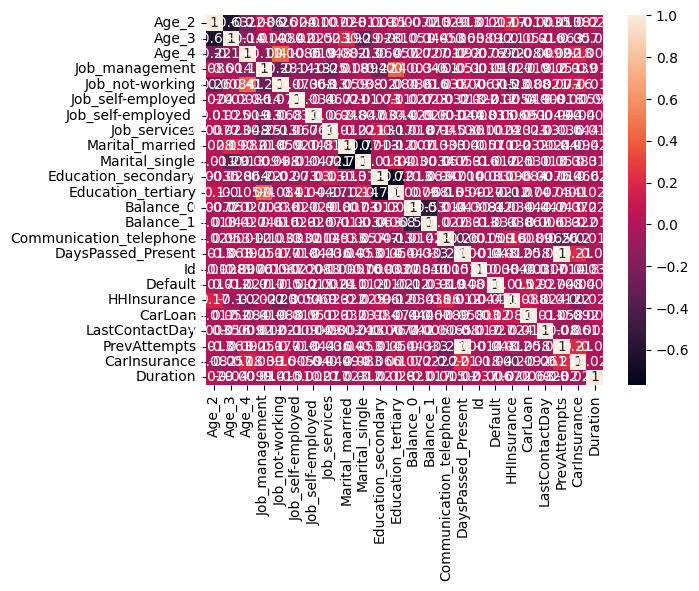

In [ ]:
sns.heatmap(df_new.corr(),annot=True)

In [ ]:
df_new.head(3)

,Age_2,Age_3,Age_4,Job_management,Job_not-working,Job_self-employed,Job_self-employed,Job_services,Marital_married,Marital_single,...,Communication_telephone,DaysPassed_Present,Id,Default,HHInsurance,CarLoan,LastContactDay,PrevAttempts,CarInsurance,Duration
0,1,0,0,1,0,0,0,0,0,1,...,1,0,1,0,1,0,28,0,0,70
1,1,0,0,0,0,0,0,0,1,0,...,1,0,2,0,1,0,26,0,0,185
2,0,0,0,1,0,0,0,0,0,1,...,0,1,3,0,1,0,3,1,1,340


In [ ]:
df_new=df_new.replace({'Communication_telephone':'Communication','DaysPassed_Present':'DaysPassed','PrevAttempts_1':'PrevAttempts'})

In [ ]:
x=df_new.drop(['CarInsurance'],axis=1)
type(x)
x

,Age_2,Age_3,Age_4,Job_management,Job_not-working,Job_self-employed,Job_self-employed,Job_services,Marital_married,Marital_single,...,Balance_1,Communication_telephone,DaysPassed_Present,Id,Default,HHInsurance,CarLoan,LastContactDay,PrevAttempts,Duration
0,1,0,0,1,0,0,0,0,0,1,...,0,1,0,1,0,1,0,28,0,70
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,2,0,1,0,26,0,185
2,0,0,0,1,0,0,0,0,0,1,...,0,0,1,3,0,1,0,3,1,340
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,4,0,1,0,11,0,819
4,0,0,0,1,0,0,0,0,1,0,...,0,0,0,5,0,0,0,3,0,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0,0,0,0,0,0,0,0,0,1,...,0,0,1,3996,0,1,0,25,1,269
3996,0,1,0,1,0,0,0,0,0,0,...,0,0,0,3997,0,1,1,29,0,125
3997,0,0,0,1,0,0,0,0,0,1,...,0,0,0,3998,0,0,1,8,0,290
3998,1,0,0,0,0,0,1,0,0,1,...,0,0,1,3999,0,1,0,29,1,99


In [ ]:
y=df_new['CarInsurance']
y
type(y)

pandas.core.series.Series

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.75, random_state= 5)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred= lr.predict(x_test)

from sklearn.metrics import f1_score,accuracy_score,classification_report,precision_score,recall_score,roc_auc_score,confusion_matrix # y = mx + c
accuracy_score(y_test,y_pred)
f1_score(y_test,y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5646359583952452

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(3000, 23)
(1000, 23)
(3000,)
(1000,)


In [ ]:
lr.coef_ # m

array([[-3.07918104e-01, -3.58349882e-01,  5.72617311e-01,
         6.52778823e-02,  4.84682419e-01,  1.88839603e-02,
        -6.37296159e-02, -8.88662055e-02, -1.99830980e-01,
         1.53206023e-02,  1.02460398e-02,  2.52382629e-01,
         3.14156986e-01,  1.94954719e-01, -6.26835144e-01,
         3.57905764e-01, -1.76668608e-05, -6.72243771e-02,
        -7.44511775e-01, -3.12484666e-01, -7.96300634e-03,
         3.57905764e-01, -3.18274330e-05]])

In [ ]:
lr.intercept_ # c

array([0.0342305])

In [ ]:
lr.intercept_ # c

array([0.0342305])

In [ ]:
y_pred.shape

(1000,)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(y_test,y_pred))
r_squared=r2_score(y_test,y_pred)
print(rmse)
print(r_squared)

0.5412947441089743
-0.22393907874565055


In [ ]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.2f}")

Accuracy:0.71


In [ ]:
confusion_matrix(y_test,y_pred)

array([[517,  86],
       [207, 190]])

In [ ]:
# cross_val_score
from sklearn.model_selection import cross_val_score,KFold
kf=KFold(n_splits=5)
score=cross_val_score(lr,x_train,y_train,cv=kf)
score

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.695     , 0.67166667, 0.68666667, 0.685     , 0.675     ])

In [ ]:
score.mean()

0.6826666666666666

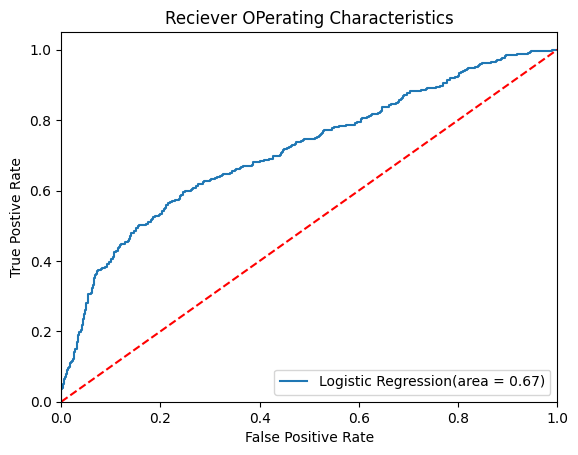

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
pred_roc= roc_auc_score(y_test,lr.predict(x_test))
fpr,tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label = 'Logistic Regression(area = %0.2f)' %pred_roc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Postive Rate')
plt.title('Reciever OPerating Characteristics')
plt.legend(loc='lower right')
plt.savefig('Log_ROC')
plt.show()

In [ ]:
df['CarInsurance'].value_counts()

0    2396
1    1604
Name: CarInsurance, dtype: int64

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))           #agr data imbalance h toh accuracy low hogi(0.71 vali)


              precision    recall  f1-score   support

           0       0.71      0.86      0.78       603
           1       0.69      0.48      0.56       397

    accuracy                           0.71      1000
   macro avg       0.70      0.67      0.67      1000
weighted avg       0.70      0.71      0.69      1000



In [ ]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
params= [{'C':[0.001,0.01,0.1,0.15,.02,.03]}]
clf=GridSearchCV(lr,params)
clf.fit(x_train,y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 0.15}
0.683


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
Rlf = RandomizedSearchCV(lr,params)
Rlf.fit(x_train,y_train)
print(Rlf.best_params_)
print(Rlf.best_score_)


{'C': 0.15}
0.683
